<a href="https://colab.research.google.com/github/sheilallee/dataset/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning: Predição de Casos de COVID-19 em Síndrome Gripal (e-SUS Notifica/PB)

## Finalidade do Projeto

O propósito central deste projeto é aplicar técnicas de **Machine Learning (Aprendizado de Máquina)** para construir um modelo preditivo. O objetivo é auxiliar na vigilância epidemiológica, estimando a probabilidade de um paciente notificado com Síndrome Gripal (SG) ser classificado como **Caso Confirmado de COVID-19**, utilizando apenas as informações demográficas e clínicas registradas no início da notificação.

## Problema de Machine Learning

Este projeto é um problema de **Classificação Binária**.

* **Pergunta Central:** Dado o perfil de um paciente (sintomas, idade, condições pré-existentes, etc.), podemos prever se a sua classificação final será **COVID-19 Positivo** ou **Negativo/Descartado**?
* **Variável-Alvo (`Y`):** A coluna `classificacaoFinal` será o alvo da predição, por meio da transformação em uma variável binária que indique se o caso foi confirmado para COVID-19 (1) ou não (0). Essa será a variável-alvo (Y) usada posteriormente no modelo de classificação.

## Descrição do Dataset

O conjunto de dados utilizado é proveniente do **Ministério da Saúde (DATASUS)**, especificamente das **Notificações de Síndrome Gripal (SG)** registradas na Paraíba (PB) no ano de 2024.

* **Origem:** Sistema **e-SUS Notifica**, implementado para a vigilância de casos leves e moderados suspeitos de COVID-19 a partir de março de 2020.
* **Conteúdo:** A base contém informações detalhadas de cada paciente notificado, incluindo dados demográficos (`idade`, `sexo`, `racaCor`), clínicos (`sintomas`, `outrasCondicoes`) e informações logísticas da notificação (`municipioNotificacao`, `dataInicioSintomas`).
* **Relevância:** Por ser um dado real do Sistema Único de Saúde (SUS), o dataset é de grande volume (cerca de 87917 mil registros) e apresenta as complexidades e os desafios de bases de dados de saúde pública, como a alta taxa de valores faltantes (`NaN`) e a necessidade de padronização de codificação.
* **Limitações dos dados:** Estados e municípios que utilizam sistemas próprios de notificação de casos suspeitos de covid-19 estão em processo de integração com o e-SUS Notifica. Assim, os dados desses locais podem apresentar uma diferença substancial até a finalização do processo de integração.

## Fonte

* **Dados:** https://opendatasus.saude.gov.br/dataset/notificacoes-de-sindrome-gripal-leve-2024
* **Dicionário de Dados:** https://opendatasus.saude.gov.br/dataset/notificacoes-de-sindrome-gripal-leve-2024/resource/17ede700-ab05-4233-9e4d-c28c768e759f
* **Dataset no github:** https://github.com/sheilallee/dataset.git




import pandas as pd
import numpy as np
import re
from unidecode import unidecode

pd.set_option('display.max_columns', None)

URL = "https://raw.githubusercontent.com/sheilallee/dataset/refs/heads/main/dadosPB.csv"
raw = pd.read_csv(URL, delimiter=';')
print("Shape bruto:", raw.shape)
raw.head()

In [ ]:
#CONFIGURAÇÃO E CARREGAMENTO DO DATASET
# Instala pacote (rodar 1x)
!pip install Unidecode

import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import re
from unidecode import unidecode

#CONFIGURAÇÃO DE EXIBIÇÃO DO PANDAS
pd.set_option('display.max_columns', None)

# Caminho completo para o arquivo
file_path = 'https://raw.githubusercontent.com/sheilallee/dataset/refs/heads/main/dadosPB.csv'

# Carregando o dataset
dataset = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
# Exibindo as primeiras linhas
dataset.head(100)

#print(f"Total de linhas do dataset: {len(dataset)}")

#print("Shape bruto:", raw.shape)
#display(raw.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.0 MB/s eta 0:00:00


/tmp/ipython-input-560671392.py:19: DtypeWarning: Columns (12,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file_path, delimiter=';', encoding='utf-8')


,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,municipioNotificacao,municipioNotificacaoIBGE,evolucaoCaso,classificacaoFinal,codigoEstrategiaCovid,codigoBuscaAtivaAssintomatico,outroBuscaAtivaAssintomatico,codigoTriagemPopulacaoEspecifica,outroTriagemPopulacaoEspecifica,codigoLocalRealizacaoTestagem,outroLocalRealizacaoTestagem,codigoRecebeuVacina,codigoLaboratorioPrimeiraDose,codigoLaboratorioSegundaDose,lotePrimeiraDose,loteSegundaDose,codigoContemComunidadeTradicional,source_id,excluido,validado,codigoDosesVacina,estadoNotificacaoIBGE,totalTestesRealizados,dataNotificacao,dataInicioSintomas,dataEncerramento,dataPrimeiraDose,dataSegundaDose,codigoEstadoTeste1,codigoTipoTeste1,codigoFabricanteTeste1,codigoResultadoTeste1,codigoEstadoTeste2,codigoTipoTeste2,codigoFabricanteTeste2,codigoResultadoTeste2,codigoEstadoTeste3,codigoTipoTeste3,codigoFabricanteTeste3,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Dor de Cabeça, Tosse, Febre, Dor de Garganta",Não,Branca,NaN,NaN,Não,NaN,Diabetes,Masculino,Pernambuco,PE,Recife,2611606,parse-cloud,Paraíba,João Pessoa,2507507.0,Cura,Síndrome Gripal Não Especificada,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,ASTRAZENECA/FIOCRUZ,NaN,214VCD085W,NaN,2.0,MTCKsWDZ7n,False,False,"1,2,3",PB,1,2022-11-15,2022-11-13,2024-12-03,2021-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Coriza, Tosse",Não,Parda,NaN,NaN,Não,NaN,NaN,Masculino,Paraíba,PB,São Bento,2513901,parse-cloud,Paraíba,São Bento,2513901.0,Ignorado,Descartado,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,T4yRLL1L8f,False,False,NaN,PB,2,2022-06-30,2022-06-25,2024-01-30,NaN,NaN,3.0,3.0,792.0,2.0,3.0,3.0,715.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-29,2022-06-30,NaN,NaN,23.0
2,Assintomático,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,Paraíba,PB,Soledade,2516102,parse-cloud,Paraíba,Soledade,2516102.0,Cura,Confirmado Laboratorial,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,202009011,202010028,2.0,oKrbuCdoED,False,False,"2,1",PB,5,2022-01-20,NaN,2024-03-23,2021-01-25,2021-02-15,3.0,3.0,715.0,2.0,3.0,3.0,715.0,1.0,3.0,3.0,715.0,1.0,3.0,3.0,792.0,1.0,2024-03-23,2023-03-20,2022-11-25,2022-06-28,50.0
3,"Dor de Cabeça, Dor de Garganta",Não,Parda,NaN,NaN,Não,NaN,NaN,Feminino,Pernambuco,PE,Recife,2611606,parse-cloud,Paraíba,João Pessoa,2507507.0,Cura,Síndrome Gripal Não Especificada,1.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,b9SDxlsKX3,False,False,NaN,PB,1,2022-03-02,2022-02-07,2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
4,"Dor de Cabeça, Dor de Garganta, Tosse",Sim,Amarela,NaN,NaN,Não,3222 - Técnicos e auxiliares de enfermagem,NaN,Feminino,Paraíba,PB,João Pessoa,2507507,parse-cloud,Paraíba,João Pessoa,2507507.0,Cura,Síndrome Gripal Não Especificada,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,SINOVAC/BUTANTAN,SINOVAC/BUTANTAN,202009011,202009011,2.0,Y1HdujjH8Z,False,False,"1,2,3,4",PB,1,2022-12-27,2022-12-24,2024-01-30,2021-01-20,2021-02-16,3.0,3.0,915.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-27,NaN,NaN,NaN,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Assintomático,Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,Paraíba,PB,João Pessoa,2507507,parse-cloud,Paraíba,João Pessoa,2507507.0,Cura,Descartado,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,ASTRAZENECA/FIOCRUZ,NaN,4120Z005,NaN,2.0,XftIQ3hFX7,False,False,"1,2,3",PB,1,2022-11-29,NaN,2024-01-24,2021-01-28,NaN,3.0,3.0,915.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-29,NaN,NaN,NaN,Na

In [ ]:
# Percentual de Valores Faltantes
faltantes_pct = dataset.isna().mean().sort_values(ascending=False)
faltantes_pct.head(30)

,0
codigoFabricanteTeste4,0.999875
codigoResultadoTeste4,0.999784
dataColetaTeste4,0.999784
codigoEstadoTeste4,0.999738
codigoTipoTeste4,0.999738
codigoFabricanteTeste3,0.999454
codigoResultadoTeste3,0.999181
dataColetaTeste3,0.999090
codigoEstadoTeste3,0.997782
codigoTipoTeste3,0.997782


## Listagem de Colunas e Classificar Manualmente



*   colunas_candidatas (demográficas, clínicas)
*   colunas_para_remover (administrativas, pós-notificação, vacinas, códigos específicos)



## Filtragem de Dados: Exclusão de Colunas

Foram removidas algumas colunas do conjunto de dados (dataset) referentes a informações pós-notificação, detalhes de vacinação (códigos laboratoriais) e campos meramente administrativos, tais como: codigoBuscaAtivaAssintomatico, codigoLocalRealizacaoTestagem, outroLocalRealizacaoTestagem, e codigoContemComunidadeTradicional.

A justificativa para a retirada desses campos é que eles não descrevem o perfil clínico do paciente ou seus sintomas. São, em essência, informações operacionais do sistema de vigilância epidemiológica, não contribuindo para a modelagem preditiva baseada nas características dos casos.

Desta forma, reduzimos a base apenas às colunas que representam informações clínicas e demográficas presentes no início da notificação. Removemos dados laboratoriais, datas posteriores e colunas irrelevantes para evitar vazamento de dados e melhorar a qualidade da modelagem.

In [ ]:
#FILTRAGEM DE COLUNAS

#COLUNAS SELECIONADAS
colunas_desejadas = [
    #Sintomas -----------------------------
    'sintomas', 'outrosSintomas',
    'condicoes', 'outrasCondicoes',
    #Dados Pessoais ------------------------
    'sexo', 'idade', 'racaCor',
   # 'profissionalSaude', 'cbo', 'profissionalSeguranca',
    #Localização da Notificação -----------
    'municipioNotificacao',
    'estadoNotificacaoIBGE',
    'evolucaoCaso',
    #Dados de Testagem ---------------------
    'totalTestesRealizados',
    # Datas relevantes ----------------------
   'dataInicioSintomas',
   'dataNotificacao',
    #Testes e resultados
    'codigoTipoTeste1', 'codigoResultadoTeste1',
    'codigoTipoTeste2', 'codigoResultadoTeste2',
    'codigoTipoTeste3', 'codigoResultadoTeste3',
    'codigoTipoTeste4', 'codigoResultadoTeste4',
    #Variável alvo -------------------------
    'classificacaoFinal'
]

# CRIAÇÃO DO DATASET FILTRADO
#dataset_filtrado = dataset[colunas_desejadas]
dataset_filtrado = dataset[colunas_desejadas].copy()

#print(f"DataFrame filtrado criado. Agora com {len(dataset_filtrado.columns)} colunas.")
print("Shape após seleção:",dataset_filtrado.shape)
dataset_filtrado.head()

Shape após seleção: (87917, 22)


,sintomas,outrosSintomas,condicoes,outrasCondicoes,sexo,idade,racaCor,municipioNotificacao,estadoNotificacaoIBGE,evolucaoCaso,totalTestesRealizados,dataInicioSintomas,dataNotificacao,codigoTipoTeste1,codigoResultadoTeste1,codigoTipoTeste2,codigoResultadoTeste2,codigoTipoTeste3,codigoResultadoTeste3,codigoTipoTeste4,codigoResultadoTeste4,classificacaoFinal
0,"Dor de Cabeça, Tosse, Febre, Dor de Garganta",NaN,Diabetes,NaN,Masculino,NaN,Branca,João Pessoa,PB,Cura,1,2022-11-13,2022-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Síndrome Gripal Não Especificada
1,"Coriza, Tosse",NaN,NaN,NaN,Masculino,23.0,Parda,São Bento,PB,Ignorado,2,2022-06-25,2022-06-30,3.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,Descartado
2,Assintomático,NaN,NaN,NaN,Masculino,50.0,Ignorado,Soledade,PB,Cura,5,NaN,2022-01-20,3.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,Confirmado Laboratorial
3,"Dor de Cabeça, Dor de Garganta",NaN,NaN,NaN,Feminino,53.0,Parda,João Pessoa,PB,Cura,1,2022-02-07,2022-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Síndrome Gripal Não Especificada
4,"Dor de Cabeça, Dor de Garganta, Tosse",NaN,NaN,NaN,Feminino,42.0,Amarela,João Pessoa,PB,Cura,1,2022-12-24,2022-12-27,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Síndrome Gripal Não Especificada


## Limpeza de Dados

*   Verificar proporção de valores ausentes, para entender onde a base é mais incompleta e definir a estratégia de tratamento.
*   Substituir NaN por vazio nas colunas de texto
* Tratamento da Idade:
  * Converter para número;
  * Valores negativos, > 110, >= NaN;
  * Imputar com mediana.


In [ ]:
#Verifica tipos dos dados
dataset_filtrado.info()
#Verificar proporção de valores ausentes
dataset_filtrado.isna().mean().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87917 entries, 0 to 87916
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sintomas               87917 non-null  object 
 1   outrosSintomas         12371 non-null  object 
 2   condicoes              8861 non-null   object 
 3   outrasCondicoes        2905 non-null   object 
 4   sexo                   87917 non-null  object 
 5   idade                  72131 non-null  float64
 6   racaCor                87916 non-null  object 
 7   municipioNotificacao   87913 non-null  object 
 8   estadoNotificacaoIBGE  87549 non-null  object 
 9   evolucaoCaso           28660 non-null  object 
 10  totalTestesRealizados  87917 non-null  int64  
 11  dataInicioSintomas     77326 non-null  object 
 12  dataNotificacao        87917 non-null  object 
 13  codigoTipoTeste1       40937 non-null  float64
 14  codigoResultadoTeste1  37550 non-null  float64
 15  co

,0
codigoResultadoTeste4,0.999784
codigoTipoTeste4,0.999738
codigoResultadoTeste3,0.999181
codigoTipoTeste3,0.997782
codigoResultadoTeste2,0.989456
codigoTipoTeste2,0.985566
outrasCondicoes,0.966957
condicoes,0.899212
outrosSintomas,0.859288
evolucaoCaso,0.674011


In [ ]:
# Tratamento de Texto: Preencher NaN com String Vazia

# Selecionar apenas colunas do tipo objeto (textos)
colunas_texto = dataset_filtrado.select_dtypes(include=["object"]).columns

# Preencher textos vazios
#dataset_filtrado[colunas_texto] = dataset_filtrado[colunas_texto].fillna("")
dataset_filtrado.loc[:, colunas_texto] = dataset_filtrado[colunas_texto].fillna("")

print("Valores faltantes em colunas de texto substituídos por vazio:")
#display(dataset_filtrado.head())

dataset_filtrado[colunas_texto].isna().sum()


Valores faltantes em colunas de texto substituídos por vazio:


,0
sintomas,0
outrosSintomas,0
condicoes,0
outrasCondicoes,0
sexo,0
racaCor,0
municipioNotificacao,0
estadoNotificacaoIBGE,0
evolucaoCaso,0
dataInicioSintomas,0


In [ ]:
#idades fora do domínio
dataset_filtrado['idade'].describe()

,idade
count,72131.000000
mean,22.905491
std,16.473550
min,0.000000
25%,6.000000
50%,24.000000
75%,37.000000
max,55.000000


In [ ]:
#visualizar menor ou igual a zero
dataset_filtrado.loc[(dataset_filtrado['idade']<=0)]

,sintomas,outrosSintomas,condicoes,outrasCondicoes,sexo,idade,racaCor,municipioNotificacao,estadoNotificacaoIBGE,evolucaoCaso,totalTestesRealizados,dataInicioSintomas,dataNotificacao,codigoTipoTeste1,codigoResultadoTeste1,codigoTipoTeste2,codigoResultadoTeste2,codigoTipoTeste3,codigoResultadoTeste3,codigoTipoTeste4,codigoResultadoTeste4,classificacaoFinal
1666,"Coriza, Dor de Cabeça",,,,Feminino,0.0,Parda,Princesa Isabel,PB,Cura,1,2023-12-15,2023-12-18,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado Laboratorial
1680,"Coriza, Tosse, Febre",,,,Feminino,0.0,Parda,Pedras de Fogo,PB,Cura,1,2023-12-10,2023-12-14,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado Laboratorial
1697,"Coriza, Distúrbios Gustativos, Dor de Cabeça, ...",,,,Feminino,0.0,Ignorado,João Pessoa,PB,Cura,1,2023-12-04,2023-12-11,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado Laboratorial
1758,Outros,PRE OPERATORIO DE CIRURGIAS HRPI,,,Feminino,0.0,Parda,Princesa Isabel,PB,Cura,1,2023-10-05,2023-10-05,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Descartado
1765,Outros,PRE OPERATORIO DE CIRURGIAS HRPI,,,Masculino,0.0,Parda,Princesa Isabel,PB,Cura,1,2023-12-12,2023-12-12,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Descartado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87703,"Dor de Cabeça, Febre, Dor de Garganta",,,,Masculino,0.0,Ignorado,Guarabira,PB,Cura,1,2023-07-05,2023-07-08,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Confirmado Laboratorial
87716,Outros,PRE OPERATORIO DE CORURGIAS HRPI,,,Feminino,0.0,Parda,Princesa Isabel,PB,Cura,1,2023-09-27,2023-09-27,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Descartado
87718,Assintomático,,,,Feminino,0.0,Parda,Água Branca,PB,Cura,1,,2023-03-23,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Descartado
87793,Assintomático,,,,Feminino,0.0,Parda,Princesa Isabel,PB,Cura,1,,2023-12-11,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Descartado


In [ ]:
#calcular a mediana da idade
mediana = sts.median(dataset_filtrado['idade'])
mediana



4.0

In [ ]:
#substituir
dataset_filtrado.loc[(dataset_filtrado['idade'] <=0)] = mediana

In [ ]:
#verificar se ainda existem idades fora do domínio
dataset_filtrado.loc[(dataset_filtrado['idade']<=0)]

,sintomas,outrosSintomas,condicoes,outrasCondicoes,sexo,idade,racaCor,municipioNotificacao,estadoNotificacaoIBGE,evolucaoCaso,totalTestesRealizados,dataInicioSintomas,dataNotificacao,codigoTipoTeste1,codigoResultadoTeste1,codigoTipoTeste2,codigoResultadoTeste2,codigoTipoTeste3,codigoResultadoTeste3,codigoTipoTeste4,codigoResultadoTeste4,classificacaoFinal


In [ ]:
# Tratamento da Idade
'''
Regras:
Converter para número.
Valores negativos ou >110 => NaN.
Imputar com mediana.
'''
'''
# converte para numérico
dataset_filtrado['idade'] = pd.to_numeric(dataset_filtrado['idade'], errors='coerce')
# zera idades fora do intervalo válido (negativas ou >110)
dataset_filtrado.loc[(dataset_filtrado['idade'] <= 0) | (dataset_filtrado['idade'] > 110), 'idade'] = np.nan
# imputação com mediana das válidas
mediana_idade = dataset_filtrado['idade'].median()
dataset_filtrado['idade'] = dataset_filtrado['idade'].fillna(mediana_idade)
# proporção tratada
dataset_filtrado['idade'].describe()

'''


,idade
count,87917.000000
mean,23.304981
std,14.636227
min,1.000000
25%,9.000000
50%,24.000000
75%,34.000000
max,55.000000


In [ ]:
#Padronização de Categorias (Sexo, Raça/Cor)

from unidecode import unidecode  # importa

# dicionários
map_sexo = {
    'masculino': 'Masculino',
    'feminino': 'Feminino',
    'nao informado': 'Ignorado',
    'ignorado': 'Ignorado',
    '': 'Ignorado'
}
map_raca = {
    'branca': 'Branca',
    'parda': 'Parda',
    'preta': 'Preta',
    'amarela': 'Amarela',
    'indigena': 'Indigena',
    'ignorado': 'Ignorado',
    'nao informado': 'Ignorado',
    '': 'Ignorado'
}

# padroniza sexo
dataset_filtrado['sexo'] = (
    dataset_filtrado['sexo']
        .astype(str)
        .str.strip()
        .str.lower()
        .apply(unidecode)
)

# aplica mapa
dataset_filtrado['sexo'] = dataset_filtrado['sexo'].map(map_sexo).fillna('Outros')

# padroniza raça/cor
dataset_filtrado['racaCor'] = (
    dataset_filtrado['racaCor']
        .astype(str)
        .str.strip()
        .str.lower()
        .apply(unidecode)
)

# aplica mapa
dataset_filtrado['racaCor'] = dataset_filtrado['racaCor'].map(map_raca).fillna('Outros')

# combinações
dataset_filtrado[['sexo','racaCor']].value_counts().head(10)


sexo       racaCor 
Feminino   Parda       28369
Masculino  Parda       21242
Feminino   Branca       8090
           Ignorado     6414
Masculino  Branca       4756
           Ignorado     4663
Outros     Outros       4461
Feminino   Amarela      4458
Masculino  Amarela      3468
Feminino   Preta        1031
Name: count, dtype: int64

In [ ]:
#Frequências

from collections import Counter

freq_sintomas = Counter([s for lista in (dataset_filtrado['lista_sintomas'] + dataset_filtrado['lista_outros_sintomas']) for s in lista])
freq_condicoes = Counter([c for lista in (dataset_filtrado['lista_condicoes'] + dataset_filtrado['lista_outras_condicoes']) for c in lista])

print("Top 15 sintomas:", freq_sintomas.most_common(15))
print("Top 10 comorbidades:", freq_condicoes.most_common(10))

Top 15 sintomas: [('tosse', 53821), ('febre', 42997), ('coriza', 35998), ('dor de cabeca', 32882), ('dor de garganta', 28720), ('outros', 11773), ('assintomatico', 10391), ('dispneia', 9767), ('mialgia', 2578), ('disturbios gustativos', 2410), ('disturbios olfativos', 2367), ('diarreia', 947), ('vomito', 924), ('dor no corpo', 659), ('odinofagia', 593)]
Top 10 comorbidades: [('outros', 2846), ('doencas cardiacas cronicas', 1656), ('diabetes', 1498), ('doencas respiratorias cronicas descompensadas', 1296), ('gestante', 1257), ('imunossupressao', 945), ('obesidade', 412), ('pre-operatorio', 401), ('has', 337), ('hipertensao', 218)]


In [ ]:
#Frequências de sintomas e comorbidades

from collections import Counter
import pandas as pd

# Combina listas de sintomas (lista_sintomas + lista_outros_sintomas)
listas_sintomas = dataset_filtrado['lista_sintomas'] + dataset_filtrado['lista_outros_sintomas']
freq_sintomas_counter = Counter([s for lista in listas_sintomas for s in lista if isinstance(lista, list)])

# Combina listas de condições (lista_condicoes + lista_outras_condicoes)
listas_condicoes = dataset_filtrado['lista_condicoes'] + dataset_filtrado['lista_outras_condicoes']
freq_condicoes_counter = Counter([c for lista in listas_condicoes for c in lista if isinstance(lista, list)])

# Converte para DataFrame ordenado
freq_sintomas_df = (
    pd.DataFrame(freq_sintomas_counter.items(), columns=['sintoma','quantidade'])
      .sort_values('quantidade', ascending=False)
      .reset_index(drop=True)
)
freq_condicoes_df = (
    pd.DataFrame(freq_condicoes_counter.items(), columns=['comorbidade','quantidade'])
      .sort_values('quantidade', ascending=False)
      .reset_index(drop=True)
)

# Adiciona ranking e percentual
total_sint = freq_sintomas_df['quantidade'].sum()
freq_sintomas_df.insert(0, 'rank', range(1, len(freq_sintomas_df)+1))
freq_sintomas_df['percent'] = (freq_sintomas_df['quantidade'] / total_sint * 100).round(2)

total_comorb = freq_condicoes_df['quantidade'].sum()
freq_condicoes_df.insert(0, 'rank', range(1, len(freq_condicoes_df)+1))
freq_condicoes_df['percent'] = (freq_condicoes_df['quantidade'] / total_comorb * 100).round(2)

# Exibe Top N
top_sintomas = freq_sintomas_df.head(10)
top_comorbidades = freq_condicoes_df.head(10)

print("Top 10 sintomas:")
display(top_sintomas)

print("Top 10 comorbidades:")
display(top_comorbidades)
'''
# Estilização simples com gradiente
styled_sintomas = (top_sintomas.style
                   .background_gradient(subset=['quantidade'], cmap='Blues')
                   .set_caption('Top 15 Sintomas'))
styled_comorb = (top_comorbidades.style
                 .background_gradient(subset=['quantidade'], cmap='Greens')
                 .set_caption('Top 10 Comorbidades'))

display(styled_sintomas)
display(styled_comorb)
'''
# (Opcional) Salvar tabelas completas
# freq_sintomas_df.to_csv('freq_sintomas.csv', index=False)
# freq_condicoes_df.to_csv('freq_comorbidades.csv', index=False)

# Informação resumida
print(f"Total de ocorrências de sintomas contabilizadas: {total_sint}")
print(f"Total de ocorrências de comorbidades contabilizadas: {total_comorb}")
print(f"Número distinto de sintomas: {freq_sintomas_df.shape[0]}")
print(f"Número distinto de comorbidades: {freq_condicoes_df.shape[0]}")

Top 10 sintomas:


,rank,sintoma,quantidade,percent
0,1,tosse,53821,21.85
1,2,febre,42997,17.45
2,3,coriza,35998,14.61
3,4,dor de cabeca,32882,13.35
4,5,dor de garganta,28720,11.66
5,6,outros,11773,4.78
6,7,assintomatico,10391,4.22
7,8,dispneia,9767,3.96
8,9,mialgia,2578,1.05
9,10,disturbios gustativos,2410,0.98


Top 10 comorbidades:


,rank,comorbidade,quantidade,percent
0,1,outros,2846,21.72
1,2,doencas cardiacas cronicas,1656,12.64
2,3,diabetes,1498,11.43
3,4,doencas respiratorias cronicas descompensadas,1296,9.89
4,5,gestante,1257,9.59
5,6,imunossupressao,945,7.21
6,7,obesidade,412,3.14
7,8,pre-operatorio,401,3.06
8,9,has,337,2.57
9,10,hipertensao,218,1.66


Total de ocorrências de sintomas contabilizadas: 246344
Total de ocorrências de comorbidades contabilizadas: 13106
Número distinto de sintomas: 2615
Número distinto de comorbidades: 650


In [ ]:
#Verificação Final de dados Faltantes

ver_final = dataset_filtrado.isna().mean().sort_values(ascending=False)
ver_final.head(20)

,0
codigoResultadoTeste4,0.949054
codigoTipoTeste4,0.949009
codigoResultadoTeste3,0.948451
codigoTipoTeste3,0.947064
codigoResultadoTeste2,0.938817
codigoTipoTeste2,0.934939
codigoResultadoTeste1,0.529943
codigoTipoTeste1,0.493090
sintomas,0.000000
outrosSintomas,0.000000


# Definição da Variável-Alvo Binária (COVID-19 Confirmado vs Não Confirmado)

## Objetivo

Transformar a coluna classificacaoFinal do dataset_filtrado em uma variável binária que indique se o caso foi confirmado para COVID-19 (1) ou não (0). Essa será a variável-alvo (Y) usada posteriormente no treinamento dos modelos de classificação.

## Motivo

Modelos de Machine Learning de classificação binária trabalham com rótulos numéricos (geralmente 0 e 1). A coluna original possui categorias textuais diferentes (ex.: “Confirmado Laboratorial”, “Descartado”, “Síndrome Gripal Não Especificada”) que precisam ser agrupadas em apenas duas classes.

## Critério adotado para o agrupamento

Consideraremos como POSITIVO (1) todos os registros cuja classificação contenha a palavra “Confirmado” (qualquer tipo de confirmação: laboratorial, clínico, clínico-epidemiológico etc.).
NEGATIVO (0) serão os demais casos: “Descartado”, “Síndrome Gripal Não Especificada”, “Ignorado”, “Cancelado”, ou qualquer outra categoria que não contenha “Confirmado”.

## Observações

* Linhas com classificacaoFinal vazia ou extremamente ambígua podem ser:
  * Mantidas como 0 (não confirmado).

## Saída

Serão criadas duas colunas:

* alvo_covid (int: 0 ou 1)
* tem_covid (bool: True/False)

Também exibiremos a distribuição (contagem e porcentagem) para verificar desbalanceamento da classe.

Depois disso, será salvo essa versão do dataset_filtrado já com a variável binária.


In [ ]:
# Assumindo que dataset_filtrado já tem a coluna alvo_covid
dist = (dataset_filtrado['alvo_covid']
        .value_counts()
        .rename('contagem')
        .to_frame()
        .sort_index())

dist['proporcao_%'] = dist['contagem'] / dist['contagem'].sum() * 100

# Funções de formatação estilo Brasil
def format_int_br(x: int) -> str:
    # milhar com ponto
    return f"{x:,}".replace(",", ".")  # 79557 -> 79.557

def format_float_br(x: float) -> str:
    # 4 casas decimais, vírgula para decimais
    return f"{x:.4f}".replace(".", ",")  # 90.491031 -> 90,4910

dist['contagem_format']   = dist['contagem'].apply(format_int_br)
dist['proporcao_format']  = dist['proporcao_%'].apply(format_float_br)
dist['classe'] = dist.index.map({0: 'Não Confirmado', 1: 'Confirmado'})

# Seleciona apenas as colunas formatadas para exibir
tabela_br = dist[['contagem_format','proporcao_format','classe']].copy()
tabela_br.index.name = 'alvo_covid'

# Exibição bonita
tabela_br_styled = (tabela_br
    .style
    .set_caption("Distribuição da Variável-Alvo")
    .set_table_styles([{'selector': 'caption',
                        'props': 'caption-side: top; font-weight: bold; font-size:14px;'}]))

display(tabela_br_styled)


,contagem_format,proporcao_format,classe
alvo_covid,,,
0,79.647,"90,5934",Não Confirmado
1,8.270,"9,4066",Confirmado



Distribuição da variável-alvo (alvo_covid):


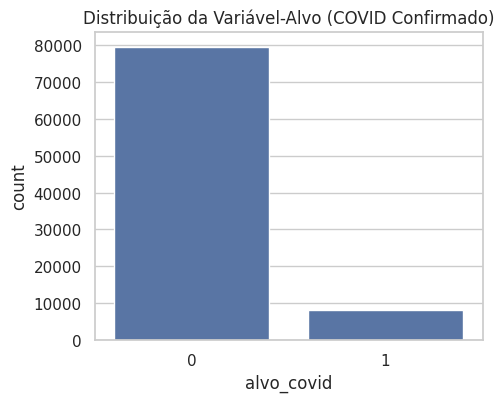

In [ ]:
# Criação da variável-alvo binária a partir de classificacaoFinal

import pandas as pd
import numpy as np
import re
from unidecode import unidecode

# Função de normalização e decisão
def map_classificacao(valor):
    """
    Retorna 1 se a classificação indicar caso confirmado para COVID-19,
    caso contrário retorna 0.
    Critério: contém 'confirmado' (ignora acento e caixa) e NÃO contém 'descartado'.
    """
    if not isinstance(valor, str):
        return 0
    txt = unidecode(valor.lower().strip())
    if "confirmado" in txt and "descartado" not in txt:
        return 1
    return 0

# Aplicar transformação
dataset_filtrado['alvo_covid'] = dataset_filtrado['classificacaoFinal'].apply(map_classificacao)

# Coluna booleana auxiliar
dataset_filtrado['tem_covid'] = dataset_filtrado['alvo_covid'] == 1

# Checar distribuição
contagem = dataset_filtrado['alvo_covid'].value_counts(dropna=False)
proporcao = dataset_filtrado['alvo_covid'].value_counts(normalize=True, dropna=False)*100

print("\nDistribuição da variável-alvo (alvo_covid):")
#print(pd.DataFrame({'contagem': contagem, 'proporcao_%': proporcao}).sort_index())

# Exemplo de visualização simples
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(5,4))
    ax = sns.countplot(x='alvo_covid', data=dataset_filtrado)
   # ax.set_xticklabels(['0 = Não Confirmado','1 = Confirmado'])
    ax.set_title('Distribuição da Variável-Alvo (COVID Confirmado)')
    plt.show()
except Exception as e:
    print("Plot não gerado (bibliotecas ausentes ou ambiente sem suporte). Erro:", e)



In [ ]:
dataset_filtrado.head()

,sintomas,outrosSintomas,condicoes,outrasCondicoes,sexo,idade,racaCor,municipioNotificacao,estadoNotificacaoIBGE,evolucaoCaso,totalTestesRealizados,dataInicioSintomas,dataNotificacao,codigoTipoTeste1,codigoResultadoTeste1,codigoTipoTeste2,codigoResultadoTeste2,codigoTipoTeste3,codigoResultadoTeste3,codigoTipoTeste4,codigoResultadoTeste4,classificacaoFinal,lista_sintomas,lista_outros_sintomas,lista_condicoes,lista_outras_condicoes,alvo_covid,tem_covid
0,"Dor de Cabeça, Tosse, Febre, Dor de Garganta",,Diabetes,,Masculino,24.0,Branca,João Pessoa,PB,Cura,1,2022-11-13,2022-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Síndrome Gripal Não Especificada,"[dor de cabeca, tosse, febre, dor de garganta]",[],[diabetes],[],0,False
1,"Coriza, Tosse",,,,Masculino,23.0,Parda,São Bento,PB,Ignorado,2,2022-06-25,2022-06-30,3.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,Descartado,"[coriza, tosse]",[],[],[],0,False
2,Assintomático,,,,Masculino,50.0,Ignorado,Soledade,PB,Cura,5,,2022-01-20,3.0,2.0,3.0,1.0,3.0,1.0,3.0,1.0,Confirmado Laboratorial,[assintomatico],[],[],[],1,True
3,"Dor de Cabeça, Dor de Garganta",,,,Feminino,53.0,Parda,João Pessoa,PB,Cura,1,2022-02-07,2022-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Síndrome Gripal Não Especificada,"[dor de cabeca, dor de garganta]",[],[],[],0,False
4,"Dor de Cabeça, Dor de Garganta, Tosse",,,,Feminino,42.0,Amarela,João Pessoa,PB,Cura,1,2022-12-24,2022-12-27,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Síndrome Gripal Não Especificada,"[dor de cabeca, dor de garganta, tosse]",[],[],[],0,False


In [ ]:
dataset_filtrado.shape

(87917, 28)